In [1]:
import gzip
import pandas
import pickle
import seaborn
import tqdm

from lib.models.aft20barzur import ptmdp
from lib.models.generic_v0.model import map_params

In [2]:
import sys

util_dir = "./sprint-0-explicit-mdps/"
sys.path.append(util_dir)

import util

sys.path.remove(util_dir)

In [3]:
mdps = pandas.read_pickle("5-generated-mdps/fixed.pkl.gz")
mdps

,problem,model,force_consider_own,merge_isomorphic,truncate_common_chain,collect_garbage,reward_common_chain,protocol,dag_size_limit,size,time_spent,rss,mdp
0,ref-fc16,fc16sapirshtein,True,True,True,True,True,bitcoin,6,47,0.001526,0.173733,796f1493
1,ref-aft20,aft20barzur,True,True,True,True,True,bitcoin,6,37,0.000878,0.174343,4af662cd
2,v1,generic-v1,False,False,True,True,True,bitcoin,6,21327,14.501364,0.339870,b0bcebe3
3,v1,generic-v1,False,False,True,True,True,ethereum_3,6,32961,22.658303,0.438072,1ec9e0cf
4,v1,generic-v1,False,False,True,True,True,byzantium_3,6,33016,25.014239,0.438927,3efc54de
5,v1,generic-v1,False,False,True,True,True,ghostdag_3,6,46966,40.091348,0.537491,7ff99c88
6,v1,generic-v1,False,False,True,True,True,parallel_3,6,9122,6.108848,0.275288,31f9737e
7,v1+fc,generic-v1,True,False,True,True,True,bitcoin,6,549,0.258839,0.230808,cb180504
8,v1+fc,generic-v1,True,False,True,True,True,ethereum_3,6,1179,0.723068,0.236877,79fa3543
9,v1+fc,generic-v1,True,False,True,True,True,byzantium_3,6,1109,0.749300,0.243916,1306d62b


In [4]:
networks = []
# for alpha in range(5, 51, 5):
for alpha in range(35, 41, 5):
    for gamma in [0.33, 0.66]:
        # for gamma in [0, 0.5, 1]:
        networks.append(dict(alpha=alpha / 100, gamma=gamma))
# pandas.DataFrame(networks)

In [5]:
horizon = 100
stop_delta = (
    0.0001  # value iteration stops when no value estimate changes more than this value
)

with tqdm.tqdm(total=len(networks) * len(mdps)) as pbar:
    rows = []
    for network in networks:
        for i, row in mdps.iterrows():
            with gzip.open(f"5-generated-mdps/mdp-{row.mdp}.pkl.gz", "rb") as f:
                emdp = pickle.load(f)
            emdp = map_params(emdp, **network)
            oae = util.optimize_and_evaluate(emdp, eps=stop_delta, horizon=horizon)
            rows.append(row.to_dict() | dict(horizon=horizon) | network | oae)
            pbar.update(1)

df = pandas.DataFrame(rows)
df.to_pickle("5-value-iterations.pkl.gz")
df

  0%|                                                                                                                                                                                                                                  | 0/96 [00:00<?, ?it/s]

  1%|██▎                                                                                                                                                                                                                       | 1/96 [00:00<00:23,  3.99it/s]

  2%|████▌                                                                                                                                                                                                                     | 2/96 [00:00<00:20,  4.59it/s]

  3%|██████▊                                                                                                                                                                                                                 | 3/96 [02:40<1:53:37, 73.31s/it]

  4%|████████▉                                                                                                                                                                                                              | 4/96 [07:25<4:00:38, 156.94s/it]

  5%|███████████▏                                                                                                                                                                                                           | 5/96 [11:14<4:37:19, 182.85s/it]

  6%|█████████████▍                                                                                                                                                                                                         | 6/96 [15:42<5:17:24, 211.60s/it]

  7%|███████████████▋                                                                                                                                                                                                       | 7/96 [16:50<4:04:14, 164.66s/it]

  8%|█████████████████▉                                                                                                                                                                                                     | 8/96 [16:53<2:46:08, 113.28s/it]

  9%|████████████████████▎                                                                                                                                                                                                   | 9/96 [17:00<1:55:59, 79.99s/it]

 10%|██████████████████████▍                                                                                                                                                                                                | 10/96 [17:05<1:21:36, 56.93s/it]

 11%|████████████████████████▊                                                                                                                                                                                                | 11/96 [17:11<58:40, 41.42s/it]

 12%|███████████████████████████▏                                                                                                                                                                                             | 12/96 [17:22<44:55, 32.09s/it]

 14%|█████████████████████████████▍                                                                                                                                                                                           | 13/96 [18:03<48:12, 34.85s/it]

 15%|███████████████████████████████▎                                                                                                                                                                                       | 14/96 [19:26<1:07:33, 49.44s/it]

 16%|█████████████████████████████████▌                                                                                                                                                                                     | 15/96 [20:30<1:12:35, 53.77s/it]

 17%|███████████████████████████████████▊                                                                                                                                                                                   | 16/96 [21:34<1:15:51, 56.89s/it]

 18%|██████████████████████████████████████▍                                                                                                                                                                                  | 17/96 [21:47<57:29, 43.66s/it]

 19%|████████████████████████████████████████▋                                                                                                                                                                                | 18/96 [21:49<40:26, 31.11s/it]

 20%|██████████████████████████████████████████▉                                                                                                                                                                              | 19/96 [21:52<29:15, 22.80s/it]

 21%|█████████████████████████████████████████████▏                                                                                                                                                                           | 20/96 [21:55<21:16, 16.79s/it]

 22%|███████████████████████████████████████████████▍                                                                                                                                                                         | 21/96 [21:58<15:39, 12.52s/it]

 23%|█████████████████████████████████████████████████▋                                                                                                                                                                       | 22/96 [22:01<11:56,  9.68s/it]

 24%|███████████████████████████████████████████████████▉                                                                                                                                                                     | 23/96 [22:05<09:35,  7.89s/it]

 25%|█████████████████████████████████████████████████████▌                                                                                                                                                                | 24/96 [32:26<3:50:18, 191.92s/it]

 26%|███████████████████████████████████████████████████████▋                                                                                                                                                              | 25/96 [32:26<2:39:07, 134.47s/it]

 27%|██████████████████████████████████████████████████████████▏                                                                                                                                                            | 26/96 [32:26<1:49:53, 94.19s/it]

 28%|████████████████████████████████████████████████████████████▏                                                                                                                                                         | 27/96 [35:34<2:20:29, 122.16s/it]

 29%|██████████████████████████████████████████████████████████████▍                                                                                                                                                       | 28/96 [40:21<3:14:40, 171.78s/it]

 30%|████████████████████████████████████████████████████████████████▋                                                                                                                                                     | 29/96 [44:47<3:43:19, 200.00s/it]

 31%|██████████████████████████████████████████████████████████████████▉                                                                                                                                                   | 30/96 [49:21<4:04:26, 222.22s/it]

 32%|█████████████████████████████████████████████████████████████████████                                                                                                                                                 | 31/96 [50:34<3:12:07, 177.34s/it]

 33%|███████████████████████████████████████████████████████████████████████▎                                                                                                                                              | 32/96 [50:38<2:13:32, 125.20s/it]

 34%|█████████████████████████████████████████████████████████████████████████▉                                                                                                                                             | 33/96 [50:44<1:34:05, 89.61s/it]

 35%|████████████████████████████████████████████████████████████████████████████▏                                                                                                                                          | 34/96 [50:50<1:06:34, 64.42s/it]

 36%|███████████████████████████████████████████████████████████████████████████████                                                                                                                                          | 35/96 [50:56<47:44, 46.96s/it]

 38%|█████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                       | 36/96 [51:07<36:10, 36.17s/it]

 39%|███████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                     | 37/96 [51:54<38:40, 39.32s/it]

 40%|█████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                   | 38/96 [53:18<50:56, 52.69s/it]

 41%|████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                | 39/96 [54:28<55:12, 58.11s/it]

 42%|██████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                              | 40/96 [55:39<57:40, 61.80s/it]

 43%|████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                            | 41/96 [55:51<43:07, 47.04s/it]

 44%|██████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                          | 42/96 [55:53<30:12, 33.57s/it]

 45%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                       | 43/96 [55:57<21:45, 24.63s/it]

 46%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                     | 44/96 [56:00<15:47, 18.22s/it]

 47%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                   | 45/96 [56:03<11:30, 13.54s/it]

 48%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                 | 46/96 [56:06<08:41, 10.42s/it]

 49%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                              | 47/96 [56:10<06:59,  8.56s/it]

 50%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                          | 48/96 [1:07:34<2:48:49, 211.03s/it]

 51%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                       | 49/96 [1:07:34<1:55:49, 147.85s/it]

 52%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                     | 50/96 [1:07:35<1:19:23, 103.56s/it]

 53%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                   | 51/96 [1:10:29<1:33:31, 124.70s/it]

 54%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                 | 52/96 [1:15:38<2:12:02, 180.05s/it]

 55%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                               | 53/96 [1:19:50<2:24:32, 201.69s/it]

 56%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                            | 54/96 [1:24:21<2:35:43, 222.48s/it]

 57%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                          | 55/96 [1:25:27<1:59:57, 175.54s/it]

 58%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                        | 56/96 [1:25:30<1:22:35, 123.88s/it]

 59%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                       | 57/96 [1:25:37<57:38, 88.69s/it]

 60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                     | 58/96 [1:25:42<40:23, 63.77s/it]

 61%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                  | 59/96 [1:25:49<28:41, 46.53s/it]

 62%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                | 60/96 [1:26:00<21:30, 35.86s/it]

 64%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                              | 61/96 [1:26:43<22:10, 38.02s/it]

 65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                            | 62/96 [1:28:03<28:40, 50.61s/it]

 66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                          | 63/96 [1:29:05<29:46, 54.15s/it]

 67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                       | 64/96 [1:30:09<30:20, 56.90s/it]

 68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                     | 65/96 [1:30:21<22:33, 43.65s/it]

 69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                   | 66/96 [1:30:23<15:34, 31.16s/it]

 70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                 | 67/96 [1:30:27<11:02, 22.85s/it]

 71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                              | 68/96 [1:30:30<07:53, 16.90s/it]

 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                            | 69/96 [1:30:32<05:40, 12.62s/it]

 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                          | 70/96 [1:30:36<04:14,  9.77s/it]

 74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                        | 71/96 [1:30:39<03:20,  8.00s/it]

 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                     | 72/96 [1:41:35<1:20:52, 202.19s/it]

 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                   | 73/96 [1:41:35<54:18, 141.68s/it]

 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                 | 74/96 [1:41:35<36:23, 99.24s/it]

 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                              | 75/96 [1:44:49<44:35, 127.41s/it]

 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                            | 76/96 [1:49:54<1:00:17, 180.89s/it]

 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                          | 77/96 [1:54:22<1:05:31, 206.92s/it]

 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                       | 78/96 [1:58:51<1:07:38, 225.49s/it]

 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                      | 79/96 [1:59:58<50:25, 177.95s/it]

 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                   | 80/96 [2:00:01<33:30, 125.68s/it]

 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                 | 81/96 [2:00:08<22:30, 90.00s/it]

 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                               | 82/96 [2:00:14<15:06, 64.73s/it]

 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 83/96 [2:00:20<10:13, 47.21s/it]

 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                          | 84/96 [2:00:31<07:16, 36.35s/it]

 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                        | 85/96 [2:01:19<07:18, 39.84s/it]

 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                      | 86/96 [2:02:40<08:39, 51.97s/it]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 87/96 [2:03:46<08:26, 56.24s/it]

 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                  | 88/96 [2:04:48<07:45, 58.15s/it]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 89/96 [2:05:01<05:11, 44.50s/it]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 90/96 [2:05:03<03:10, 31.81s/it]

 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 91/96 [2:05:07<01:56, 23.33s/it]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████         | 92/96 [2:05:10<01:09, 17.26s/it]

 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 93/96 [2:05:13<00:38, 12.89s/it]

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 94/96 [2:05:16<00:19,  9.96s/it]

 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 95/96 [2:05:20<00:08,  8.26s/it]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 96/96 [2:17:28<00:00, 224.35s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 96/96 [2:17:28<00:00, 85.93s/it]

,problem,model,force_consider_own,merge_isomorphic,truncate_common_chain,collect_garbage,reward_common_chain,protocol,dag_size_limit,size,...,vi_time,vi_max_value,ss_reachable,ss_nonzero,ss_time,pe_iter,ptrev,rpp,time,vi_steady_value
0,ref-fc16,fc16sapirshtein,True,True,True,True,True,bitcoin,6,47,...,0.247012,41.488150,19,19,0.001135,2,0.291043,0.382590,0.249088,37.955464
1,ref-aft20,aft20barzur,True,True,True,True,True,bitcoin,6,37,...,0.192262,40.935026,17,17,0.000622,2,0.170436,0.379228,0.193370,37.484435
2,v1,generic-v1,False,False,True,True,True,bitcoin,6,21327,...,159.251793,39.915454,42,42,0.001070,2,0.122248,0.376756,159.494988,37.431885
3,v1,generic-v1,False,False,True,True,True,ethereum_3,6,32961,...,283.480204,55.142094,357,357,0.009678,2,0.144579,0.517720,284.062479,51.178889
4,v1,generic-v1,False,False,True,True,True,byzantium_3,6,33016,...,227.124544,38.998731,110,110,0.001724,2,0.124940,0.365913,227.734735,36.179560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,v1+fc+n,generic-v1,True,True,True,True,True,byzantium_3,6,572,...,3.070160,48.973141,89,89,0.001615,2,0.185071,0.476153,3.078089,46.876306
92,v1+fc+n,generic-v1,True,True,True,True,True,ghostdag_3,6,604,...,2.644354,42.580938,47,47,0.001011,2,0.191304,0.411187,2.651835,40.268141
93,v1+fc+n,generic-v1,True,True,True,True,True,parallel_3,6,492,...,3.109200,55.061288,112,112,0.002013,2,0.192119,0.543091,3.116842,53.057343
94,v0+fc+n,generic-v0,True,True,True,True,True,bitcoin,6,501,...,4.269770,57.377046,64,64,0.001228,2,0.198653,0.551257,4.278848,54.775965


# Reward per progress, source model, steady state

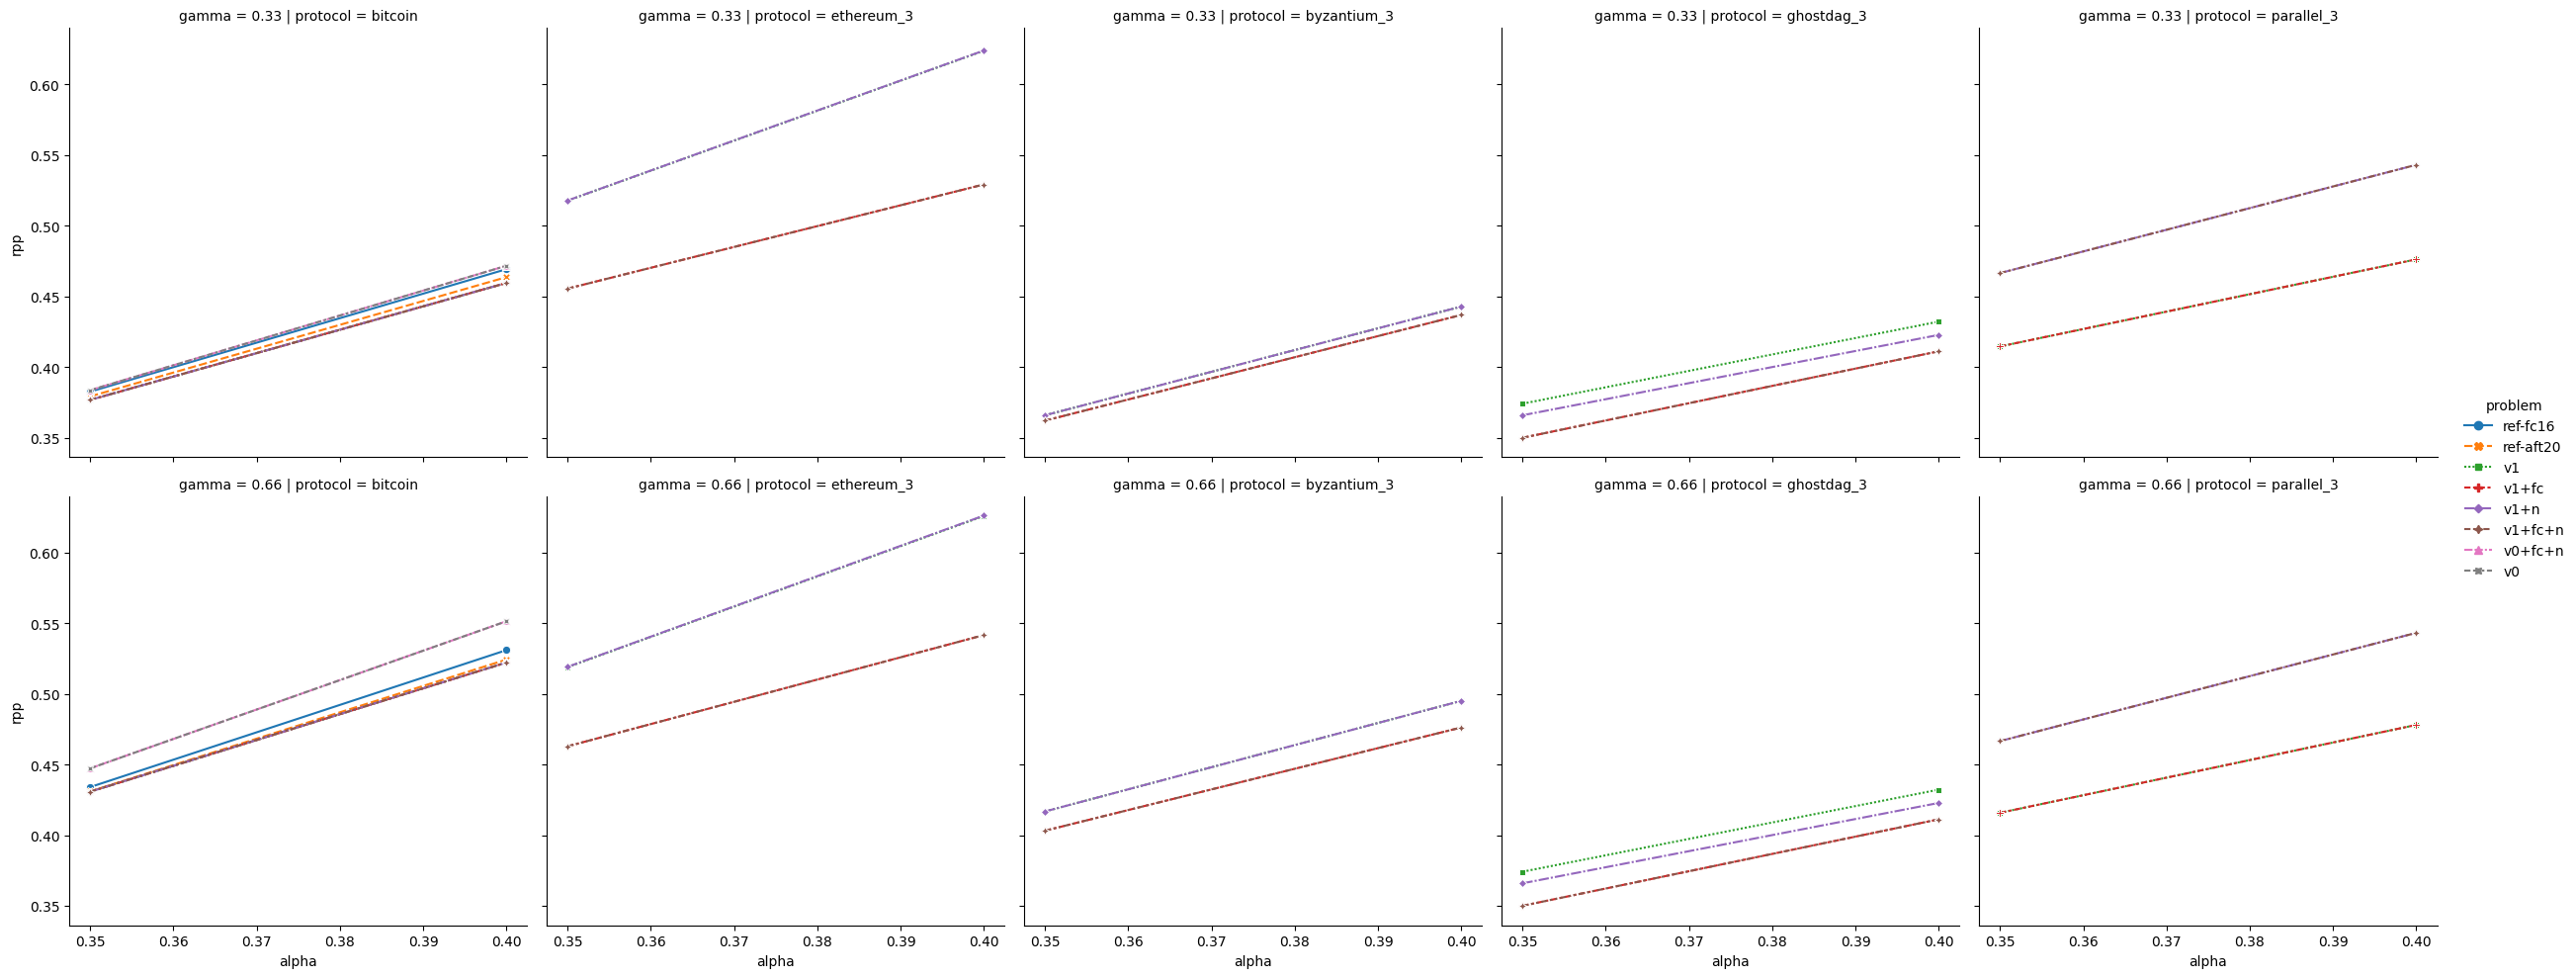

In [6]:
seaborn.relplot(
    data=df,
    kind="line",
    x="alpha",
    y="rpp",
    col="protocol",
    hue="problem",
    style="problem",
    markers=True,
    row="gamma",
)

# Revenue, PTO model, at source-model steady state

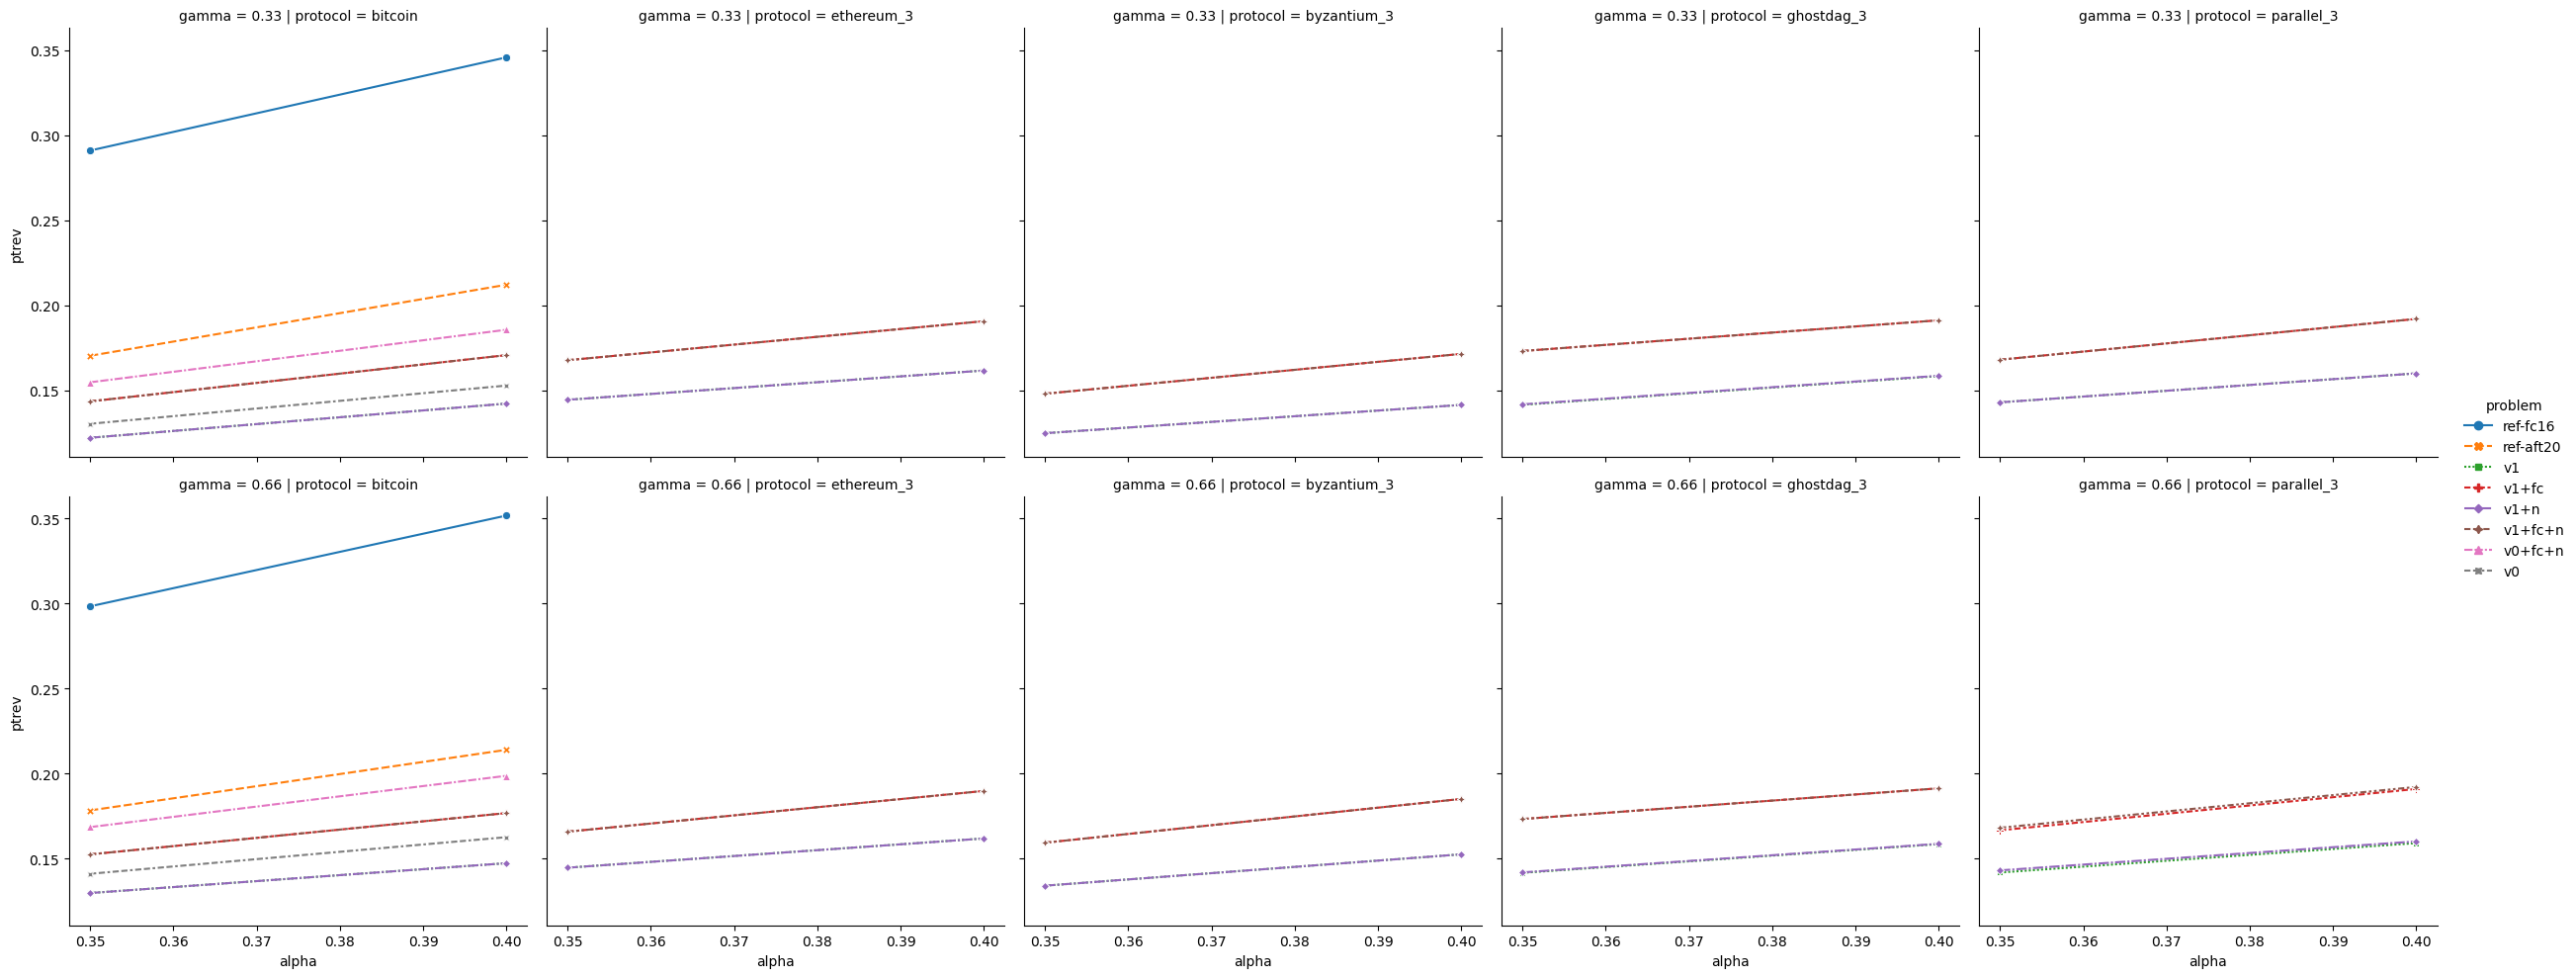

In [7]:
seaborn.relplot(
    data=df,
    kind="line",
    x="alpha",
    y="ptrev",
    col="protocol",
    hue="problem",
    style="problem",
    markers=True,
    row="gamma",
)